# CaseStudy of Water Purifier Analysis

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import re 
import time
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df4=pd.read_csv(r"C:\Users\user\Downloads\Water_purifier3.csv") 

In [5]:
df4.dtypes

ProductName          object
Price(₹)              int64
Original_cost(₹)      int64
Rating              float64
Discount(%)         float64
Delivery_offers      object
Type_models          object
ProductName.1        object
Capacity (L/hr)       int64
dtype: object

In [4]:
df4.shape

(407, 9)

In [6]:
df4['Capacity (L/hr)'].value_counts()

5        143
12        81
15        60
20        28
10        22
18        14
14         7
1          6
25         5
30         5
8          4
60         4
50         3
100        2
120        2
6000       2
16         2
24         2
90         2
22         2
7000       2
4          1
21         1
45         1
6          1
7          1
10000      1
114        1
36         1
8000       1
Name: Capacity (L/hr), dtype: int64

# User requires only Electrical & Storage type

In [7]:
df_user = df4[df4['Type_models']=='Electrical & Storage']

# User requires Water purifier under Rs.6000

In [8]:
df_user = df_user[df_user['Price(₹)']<6000]

# User requires storage capacity of 5L

In [9]:
df_user = df_user[df_user['Capacity (L/hr)']==5]

In [10]:
df_user

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,ProductName.1,Capacity (L/hr)
24,Kinsco Aqua,4599,20000,4.1,77.0,Free delivery,Electrical & Storage,Kinsco Aqua,5
27,Aqua Fresh,3999,12999,3.9,69.0,Free delivery,Electrical & Storage,Aqua Fresh,5
33,Aqua Fresh,4475,12300,4.1,63.0,Free delivery,Electrical & Storage,Aqua Fresh,5
41,Always Misty,5335,18000,4.3,70.0,Free delivery,Electrical & Storage,Always Misty,5
72,Aqua Fresh,3999,16500,3.9,75.0,Free delivery,Electrical & Storage,Aqua Fresh,5
78,MarQ by,2429,9999,3.9,75.0,Free delivery,Electrical & Storage,MarQ by,5
81,Grand plus,3999,16500,3.8,75.0,Free delivery,Electrical & Storage,Grand plus,5
108,proven RO,4968,19990,4.2,75.0,Free delivery,Electrical & Storage,proven RO,5
111,R.K. AQUA,4163,12999,4.1,67.0,Free delivery,Electrical & Storage,R.K. AQUA,5
118,Aqua Fresh,4499,16500,3.8,72.0,Free delivery,Electrical & Storage,Aqua Fresh,5


In [11]:
df_user.describe()

,Price(₹),Original_cost(₹),Rating,Discount(%),Capacity (L/hr)
count,36.000000,36.000000,36.000000,36.000000,36.0
mean,4014.694444,14108.833333,3.977778,67.375000,5.0
std,1358.255558,5595.317974,0.449832,9.859278,0.0
min,349.000000,999.000000,2.000000,37.000000,5.0
25%,3719.250000,12999.000000,3.800000,63.750000,5.0
50%,4487.000000,14099.000000,4.050000,69.500000,5.0
75%,4953.750000,16699.000000,4.300000,75.000000,5.0
max,5998.000000,24999.000000,4.700000,81.000000,5.0


In [12]:
df_user["ProductName"].value_counts()

Aqua Fresh           7
AquaDpure Copper     3
Kinsco Aqua          2
Grand plus           2
R.K. AQUA            2
Aqua Ace             2
FESCHON Sensible     1
Aquaultra Total      1
AquaDart Premium     1
Aquafresh Alfa       1
Remino 10            1
JX PERT              1
Remino Complete      1
DrinkPrime Rental    1
AQUA DOVE            1
proven 3000          1
Aquaultra ULS        1
Purosis Dolphin      1
Always Pio           1
Aquafresh NYC        1
proven RO            1
MarQ by              1
Always Misty         1
Always Classic       1
Name: ProductName, dtype: int64

In [13]:
df_user['ProductName'].nunique()

24

In [14]:
df_user['Type_models'].unique()

array(['Electrical & Storage'], dtype=object)

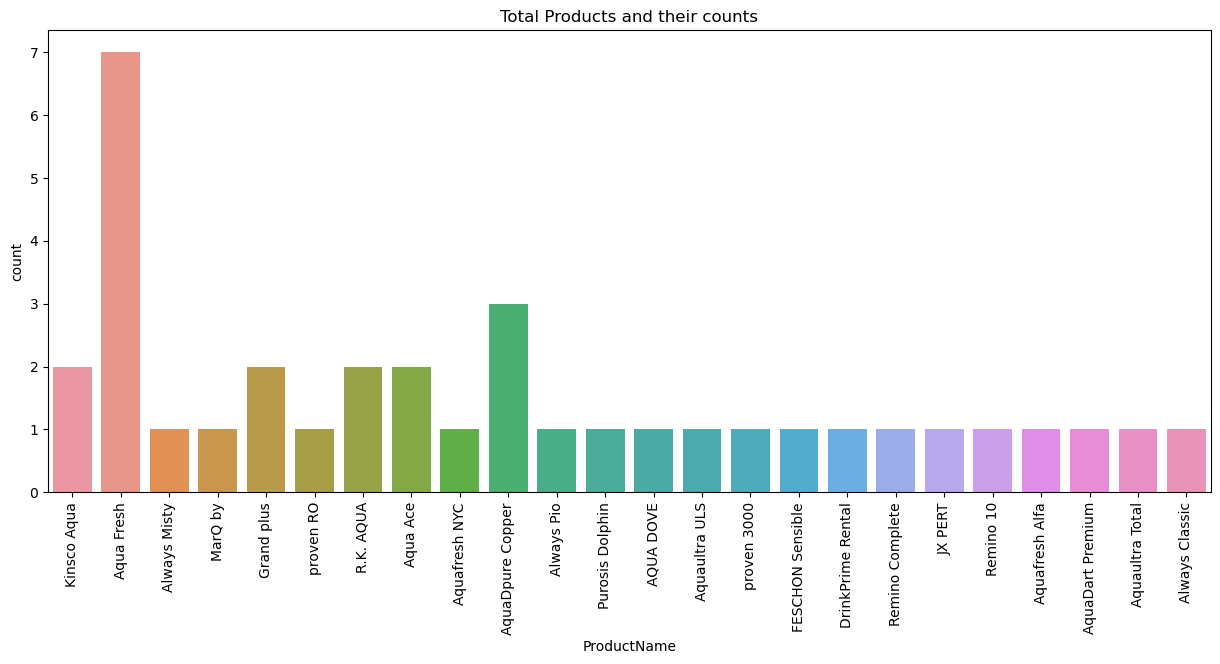

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x="ProductName",data=df_user).set(title='Total Products and their counts')
plt.xticks(rotation = 90)
plt.show()

# Observations
- Grand plus has more products approxmatlly 10 counts

C:\Users\user\AppData\Local\Temp\ipykernel_3988\1808776067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_user["Price(₹)"],kde=True)


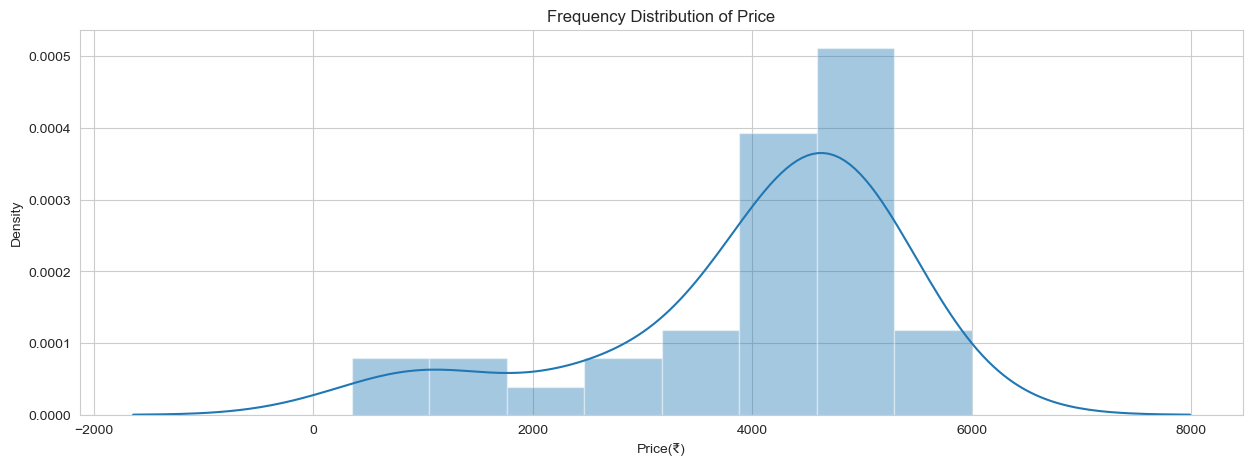

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.distplot(df_user["Price(₹)"],kde=True)
plt.title('Frequency Distribution of Price')
plt.show()

# Observations
- In below Rs.6000 there are more products at Rs.4500
- There is more then 0.0006 probabilty for having the price range of Rs.4500

# categorical

In [17]:
df_user["Delivery_offers"].value_counts()

Free delivery       34
Delivery charges     2
Name: Delivery_offers, dtype: int64

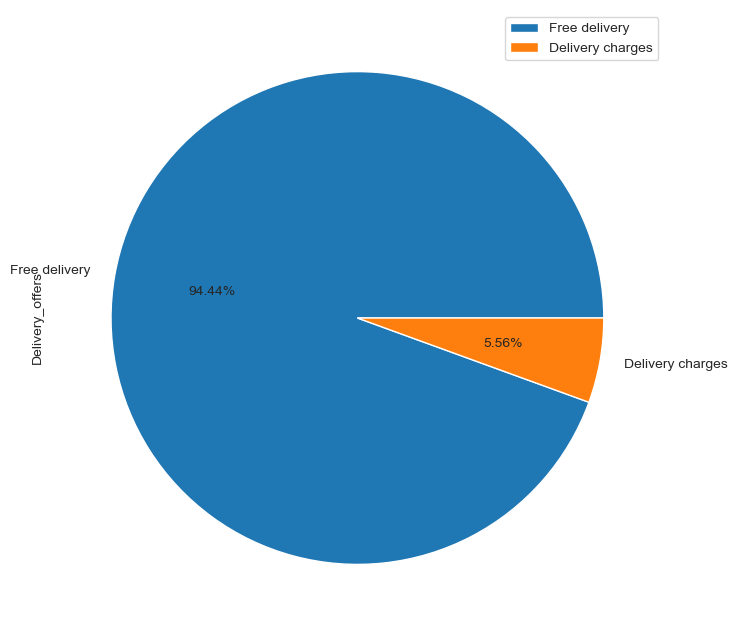

In [18]:
plt.figure(figsize=(10,8))
df_user["Delivery_offers"].value_counts().plot.pie(autopct="%.2f%%");
plt.legend(['Free delivery','Delivery charges'])
plt.show()

# Observations
- There are 79.79% of free delivery items in the price range below Rs.6000
- There is 20.21% of devlivery charged items in the price range below Rs.6000 

In [45]:
plt.figure(figsize=(15,5))
sns.violinplot(df_user["Original_cost(₹)"])


KeyError: 0

<Figure size 1500x500 with 0 Axes>

# Observations
- There was more ratings between 4.0 to 4.3 in the price range below Rs.6000

In [43]:
plt.figure(figsize=(15,5))
sns.violinplot(df_user["Original_cost(₹)"])    


KeyError: 0

<Figure size 1500x500 with 0 Axes>

# Observations
- At Rs.15000 there was more items for original cost in the price range below Rs.6000 

# Boxplot

In [28]:
df_user.columns

Index(['ProductName', 'Price(₹)', 'Original_cost(₹)', 'Rating', 'Discount(%)',
       'Delivery_offers', 'Type_models', 'ProductName.1', 'Capacity (L/hr)'],
      dtype='object')

<Axes: xlabel='Original_cost(₹)', ylabel='Discount(%)'>

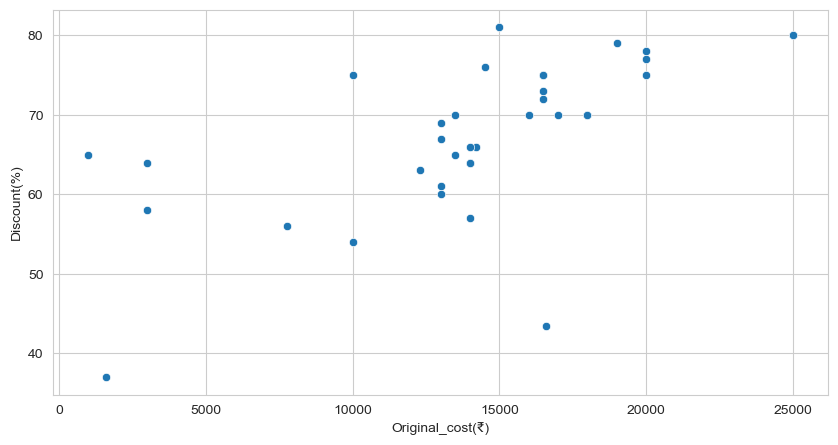

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(y='Discount(%)',x='Original_cost(₹)',data=df_user)

# Observations
- For price range between Rs.12500-Rs.20000 having more discount from 60% to above 70%.

<Axes: xlabel='Rating', ylabel='Price(₹)'>

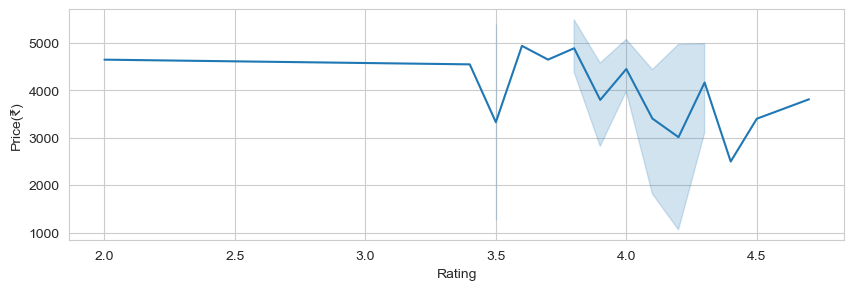

In [30]:
plt.figure(figsize=(10,3))
sns.lineplot(x='Rating',y='Price(₹)',data=df_user)
# Most preferred rating is 4.5 with price 12500 to 15000

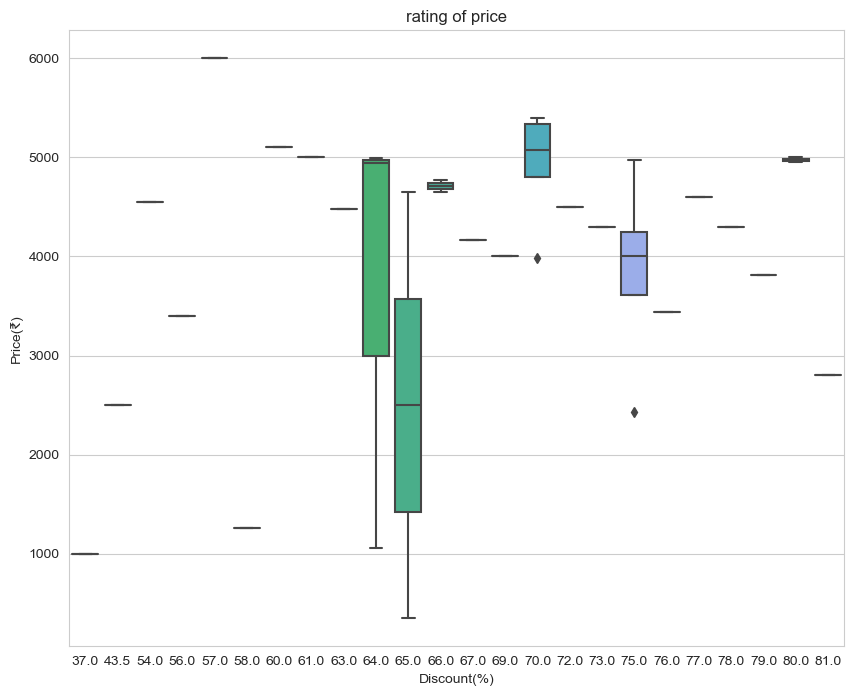

In [31]:
plt.figure(figsize=[10,8])
sns.boxplot(x="Discount(%)", y="Price(₹)", data=df_user)
plt.title('rating of price')
plt.show()

# Heat Map

C:\Users\user\AppData\Local\Temp\ipykernel_3988\141496711.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_user.corr(),annot=True)


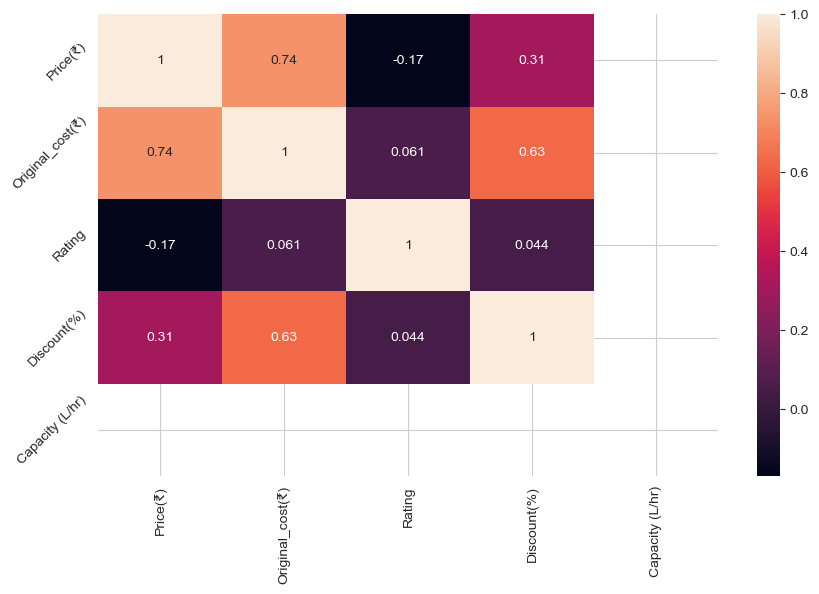

In [32]:
plt.figure(figsize=(10,6)) # very useful plot to check correlations between any two numerical variables
sns.heatmap(df_user.corr(),annot=True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

# Box plot

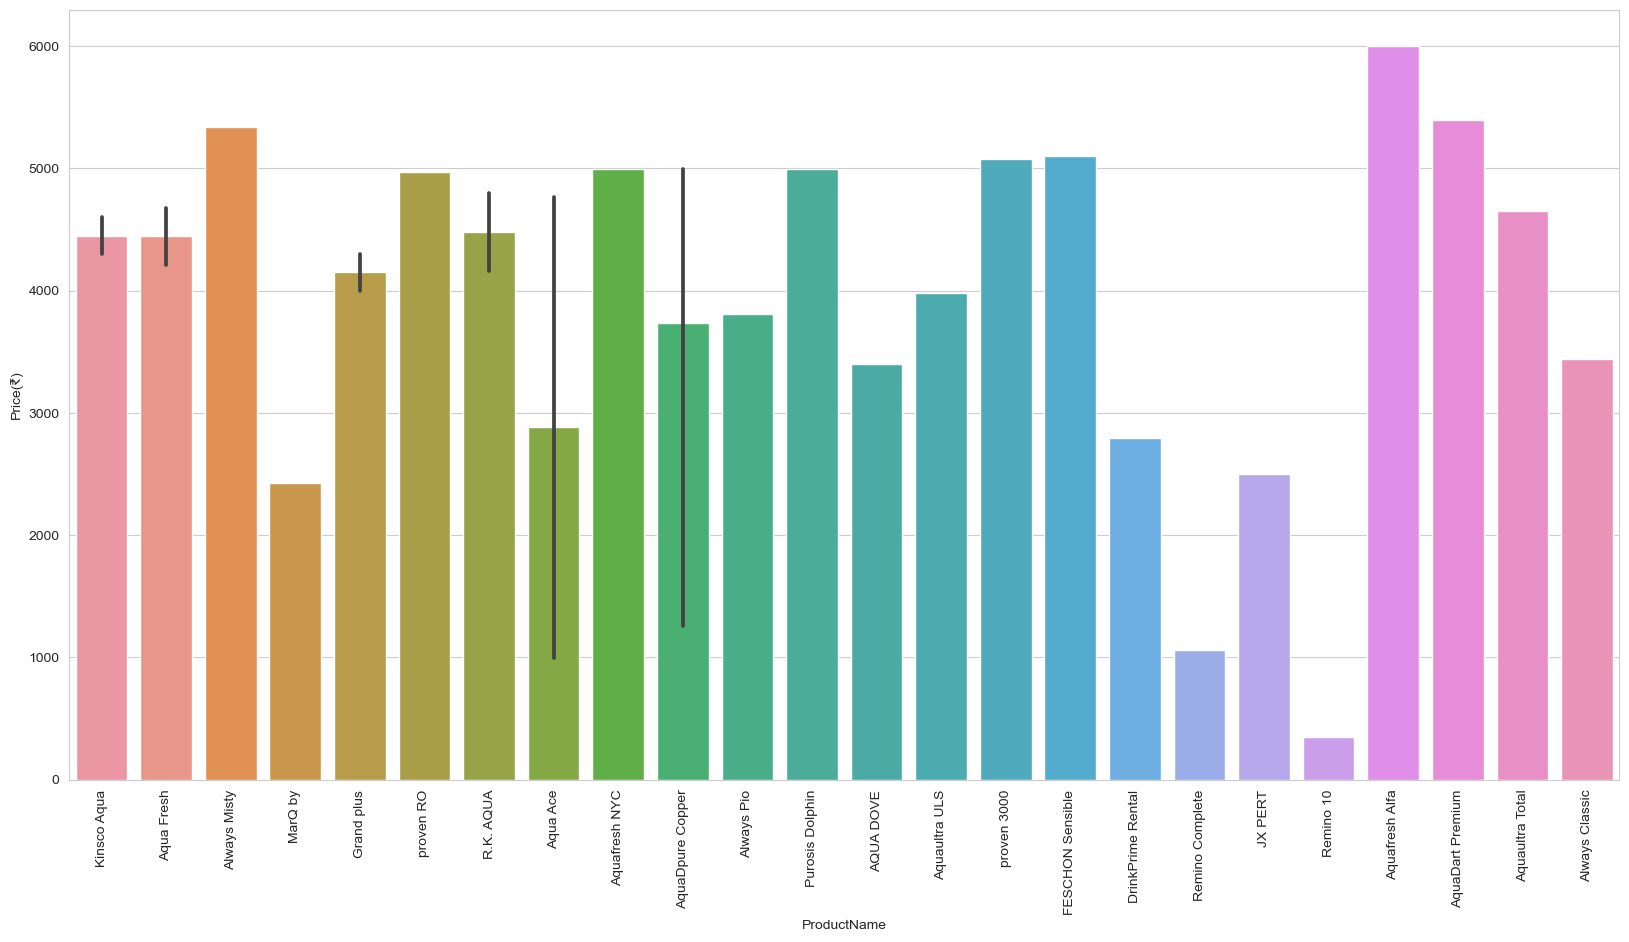

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='ProductName',y='Price(₹)',data=df_user)
plt.xticks(rotation = 90)
plt.show()

## BOX plot

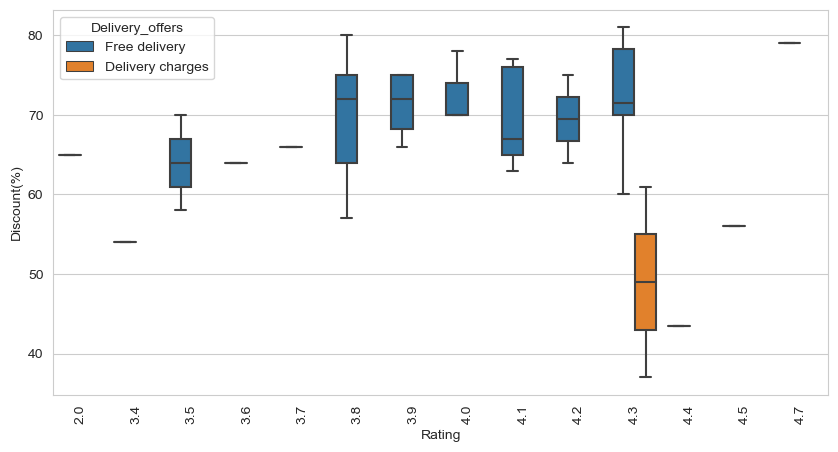

In [34]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df_user, x="Rating", y="Discount(%)", hue="Delivery_offers")
plt.xticks(rotation = 90)
plt.show()

# Observations

+ In between ratings of 4.3 to 4.7 the delivery chages are more
+ The 60-70% of discount water purifiers delivery is free

# Thank you